In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [114]:
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForImageClassification, pipeline
from PIL import Image
import torch

In [65]:
import random

# Data Loading and Exploration

In [4]:
pwd

'/Users/majamielke/code/Cdennis51/Neurocheck/notebook'

In [5]:
df = pd.read_parquet('/Users/majamielke/code/Cdennis51/Neurocheck/raw_data/Alz_raw_data/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet')

In [6]:
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [7]:
df.columns

Index(['image', 'label'], dtype='object')

In [8]:
df.label.value_counts()

label
2    2566
3    1781
0     724
1      49
Name: count, dtype: int64

(array([ 724.,    0.,    0.,   49.,    0.,    0., 2566.,    0.,    0.,
        1781.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

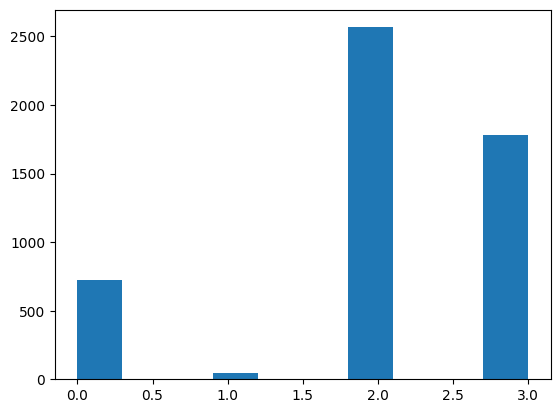

In [9]:
plt.hist(df.label)

In [29]:
from datasets import load_dataset

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Print the number of examples and the first few samples
print("Number of examples:", len(dataset))
print("Sample data:")
for example in dataset[:5]:
    print(example)

Number of examples: 5120
Sample data:
image
label


In [30]:
dataset_for_plotting = load_dataset("Falah/Alzheimer_MRI")
print(dataset)

label_names = dataset_for_plotting['train'].features['label'].names
print("Class names:", label_names)  # ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

# Class distribution
train_labels = dataset_for_plotting['train']['label']
print("Train label distribution:", Counter(train_labels))

Dataset({
    features: ['image', 'label'],
    num_rows: 5120
})
Class names: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
Train label distribution: Counter({2: 2566, 3: 1781, 0: 724, 1: 49})


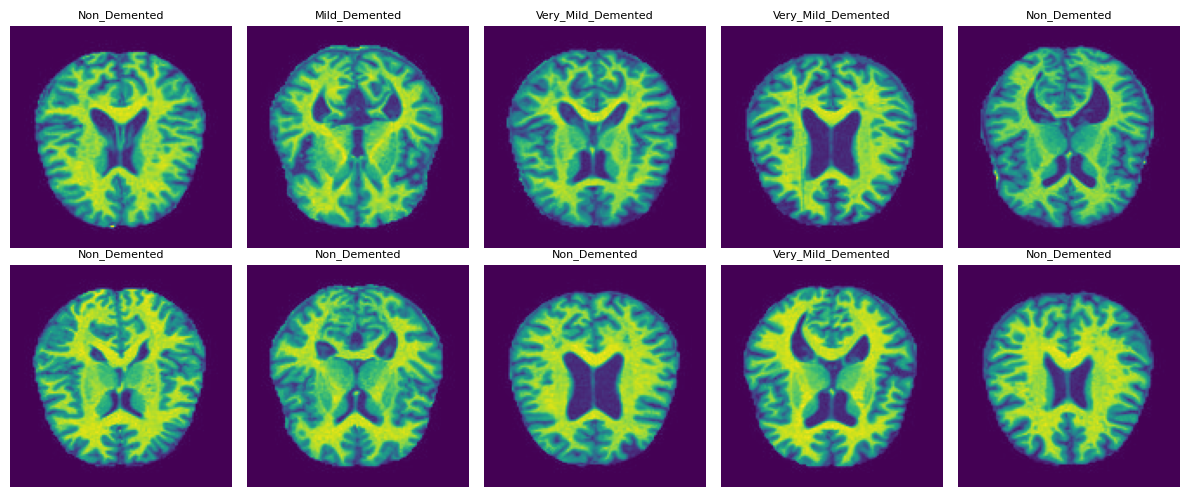

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    img = dataset_for_plotting['train'][i]['image']
    label = dataset_for_plotting['train'][i]['label']
    ax.imshow(img, cmap= 'viridis')
    ax.set_title(dataset_for_plotting['train'].features['label'].names[label], fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [32]:
type(dataset)

datasets.arrow_dataset.Dataset

In [33]:
# Explore the dataset structure
print("Dataset info:")
print(f"Number of samples: {len(dataset)}")
print(f"Features: {dataset.features}")
print(f"First sample keys: {dataset[0].keys()}")

Dataset info:
Number of samples: 5120
Features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'])}
First sample keys: dict_keys(['image', 'label'])


In [14]:
dataset.features['label'].names

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [15]:
# Check unique labels
labels = dataset['label']
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")
print(f"Number of classes: {len(unique_labels)}")

Unique labels: {0, 1, 2, 3}
Number of classes: 4


In [16]:
# Create label mappings
label_names = sorted(dataset.features['label'].names)
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {label: i for i, label in enumerate(label_names)}

print(label_names)
print(f"Label mapping: {id2label}")
print(f"Label mapping: {label2id}")

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
Label mapping: {0: 'Mild_Demented', 1: 'Moderate_Demented', 2: 'Non_Demented', 3: 'Very_Mild_Demented'}
Label mapping: {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [17]:
# Split dataset into train/validation
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset['train']
val_dataset = dataset['test']

print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Train samples: 4096
Validation samples: 1024


In [11]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from transformers import AutoImageProcessor, AutoModel

classifier = pipeline("image-classification", model="DHEIVER/Alzheimer-MRI")
#processor = AutoImageProcessor.from_pretrained("DHEIVER/Alzheimer-MRI", use_fast = False)

Device set to use mps:0


In [12]:
# Get label mappings from the model
id2label = model.config.id2label
label2id = model.config.label2id

print(f"Number of classes: {len(id2label)}")
print(f"Classes: {list(id2label.values())}")


Number of classes: 4
Classes: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


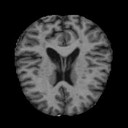

In [36]:
dataset[0]['image']

In [37]:
result = classifier(dataset[0]['image'])

In [38]:
result

[{'label': 'Non_Demented', 'score': 0.9857170581817627},
 {'label': 'Very_Mild_Demented', 'score': 0.01094865147024393},
 {'label': 'Moderate_Demented', 'score': 0.0022181805688887835},
 {'label': 'Mild_Demented', 'score': 0.0011160846333950758}]

In [39]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
 'label': 2}

In [41]:
print(f"Label mapping: {id2label}")

Label mapping: {0: 'Mild_Demented', 1: 'Moderate_Demented', 2: 'Non_Demented', 3: 'Very_Mild_Demented'}


In [46]:
print(f"True label: {id2label.get(dataset[0]['label'])}")
print(f"Predicted label: {result[0]['label']}")

True label: Non_Demented
Predicted label: Non_Demented


# We'll test the classifier on 10 random images from our data for each category

In [56]:
dataset[0:10]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128>],
 'label': [2, 0, 3, 3, 2, 2, 2, 2, 3, 2]}

In [75]:
# Group indices by label first
label_to_indices = {}
for i, item in enumerate(dataset):
    label = item['label']
    if label not in label_to_indices:
        label_to_indices[label] = []
    label_to_indices[label].append(i)

In [84]:
label_to_indices.keys()

dict_keys([2, 0, 3, 1])

In [106]:
samples = {}
for label, indices in label_to_indices.items():
    sampled_indices = random.sample(indices, min(100,len(indices)))
    sampled_images = [dataset[i]['image'] for i in sampled_indices]
    samples[label] = sampled_images

In [111]:
len(samples[0])

100

In [113]:
for label in samples.keys():
    for image in samples[label]:
        result = classifier(image)
        if not (id2label[label] == result[0]['label']):
            print(f"True label: {id2label[label]},\n Predicted label: {result}")

True label: Non_Demented,
 Predicted label: [{'label': 'Very_Mild_Demented', 'score': 0.958340585231781}, {'label': 'Non_Demented', 'score': 0.037633053958415985}, {'label': 'Mild_Demented', 'score': 0.002150984713807702}, {'label': 'Moderate_Demented', 'score': 0.0018754120683297515}]
True label: Non_Demented,
 Predicted label: [{'label': 'Very_Mild_Demented', 'score': 0.7003695368766785}, {'label': 'Non_Demented', 'score': 0.2952191233634949}, {'label': 'Moderate_Demented', 'score': 0.0023493715561926365}, {'label': 'Mild_Demented', 'score': 0.0020619966089725494}]
True label: Mild_Demented,
 Predicted label: [{'label': 'Non_Demented', 'score': 0.5599314570426941}, {'label': 'Mild_Demented', 'score': 0.4294601380825043}, {'label': 'Moderate_Demented', 'score': 0.005751748103648424}, {'label': 'Very_Mild_Demented', 'score': 0.004856660962104797}]
True label: Mild_Demented,
 Predicted label: [{'label': 'Very_Mild_Demented', 'score': 0.9906389713287354}, {'label': 'Mild_Demented', 'scor

In [112]:
id2label

{0: 'Mild_Demented',
 1: 'Moderate_Demented',
 2: 'Non_Demented',
 3: 'Very_Mild_Demented'}

# Functions for predicting and loading the model

In [ ]:
from transformers import pipeline

In [128]:
def predict(preprocessed_image):

    # Create a pipeline
    classifier = pipeline("image-classification", model="DHEIVER/Alzheimer-MRI")

    # Get label mappings from the model
    try:
        id2label = model.config.id2label
        label2id = model.config.label2id

        print(f"Number of classes: {len(id2label)}")
        print(f"Classes: {id2label}")
    
    except:
        print("Failed to get label mappings from the model.")

    # Predict the label
    result = classifier(preprocessed_image)

    return result[0]

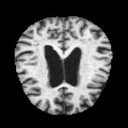

In [124]:
dataset_for_plotting['test'][0]['image']

In [126]:
dataset_for_plotting['test'][0]['label']

3

In [127]:
id2label

{0: 'Mild_Demented',
 1: 'Moderate_Demented',
 2: 'Non_Demented',
 3: 'Very_Mild_Demented'}

In [129]:
predict(dataset_for_plotting['test'][0]['image'])

Device set to use mps:0


Number of classes: 4
Classes: {0: 'Mild_Demented', 1: 'Moderate_Demented', 2: 'Non_Demented', 3: 'Very_Mild_Demented'}


{'label': 'Very_Mild_Demented', 'score': 0.991272509098053}

# Preprocessing upload for prediction

In [131]:
from PIL import Image

To do:
1. format jpeg to greyscale 128x128 pixels

In [135]:
def resize_upload(uploaded_image_bytes):

    #Convert to PIL image
    image = Image.open(io.BytesIO(uploaded_image_bytes))
    image = image.convert('L')
    image = image.resize(128,128)

    return image

In [138]:
# Method 1: FastAPI with file upload
from fastapi import FastAPI, File, UploadFile
from PIL import Image
import io

app = FastAPI()

@app.post("/predict/")
async def predict_image(file: UploadFile = File(...)):
    
    # Read the uploaded file
    contents = await file.read()
    
    image = resize_upload(contents)
    
    print(f"Processed image: {image}")  # Will show: <PIL.Image.Image image mode=L size=128x128>
    
    # Use with classifier
    result = predict(image)
    
    return {"Prediction": result}